Epoch 1/50
49/49 [==============================] - 0s 2ms/step - loss: 8.0201e-05
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 3.9928e-05
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 3.7945e-05
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 4.4349e-05
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 3.6737e-05
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 3.7083e-05
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 3.6605e-05
Epoch 8/50
49/49 [==============================] - 0s 3ms/step - loss: 3.5291e-05
Epoch 9/50
49/49 [==============================] - 0s 2ms/step - loss: 3.5714e-05
Epoch 10/50
49/49 [==============================] - 0s 3ms/step - loss: 3.6772e-05
Epoch 11/50
49/49 [==============================] - 0s 2ms/step - loss: 3.4448e-05
Epoch 12/50
49/49 [==============================] - 0s 2ms/step - loss: 3.6270e-05
E

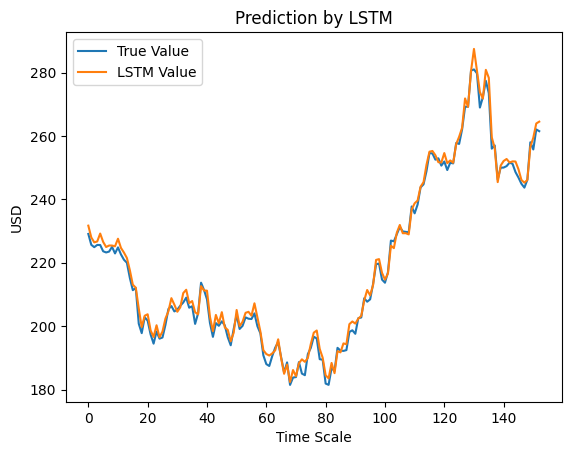

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import LSTM, Dense

# Get the Dataset
df = pd.read_csv("Tesla.csv", na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

# Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])

# Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

# Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
output_var = scaler.fit_transform(output_var)

# Splitting into Training Set and Test Set
timesplit = TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[train_index], feature_transform[test_index]
    y_train, y_test = output_var[train_index], output_var[test_index]

# Process the data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialising the model
model = Sequential()

# Adding the 1st LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

# Adding the 2nd LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding the 3rd LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding the 4th LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding the 5th LSTM layer along with dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.5))

# Adding the 6th LSTM layer along with dropout regularization
model.add(LSTM(units=100))
model.add(Dropout(0.5))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer = RMSprop(learning_rate=0.001),loss='mean_squared_error')

# Model Training
history = lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, shuffle=True)

# LSTM Prediction
y_pred = lstm.predict(X_test)

# Inverse transform the predictions and true values to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R-squared (Coefficient of Determination):", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Plotting Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('USD')
plt.legend()
plt.show()
